In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/water_quality_.csv")

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
0,NaN,204.890456,20791.31898,7.300212,368.516441,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Organic_carbon   3276 non-null   float64
 6   Trihalomethanes  3114 non-null   float64
 7   Turbidity        3276 non-null   float64
 8   Check            3276 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 230.5 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690300,6.127421,307.699498,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833605,7.130299,333.073546,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762125,8.114887,359.950170,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Check                0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Check              0
dtype: int64

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Organic_carbon,Trihalomethanes,Turbidity,Check
3,8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.68774,7.544869,326.678363,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.71654,7.513408,393.663395,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.09176,4.563009,303.309771,12.363817,62.798309,4.401425,0


<Axes: >

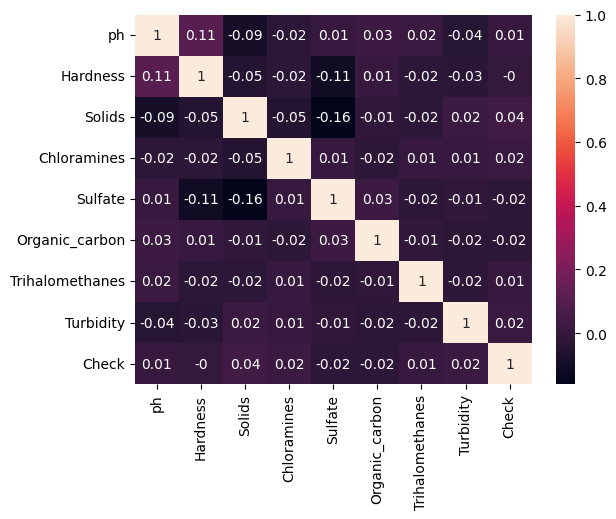

In [ ]:
sns.heatmap(df.corr().round(2),annot=True)

<Axes: xlabel='ph'>

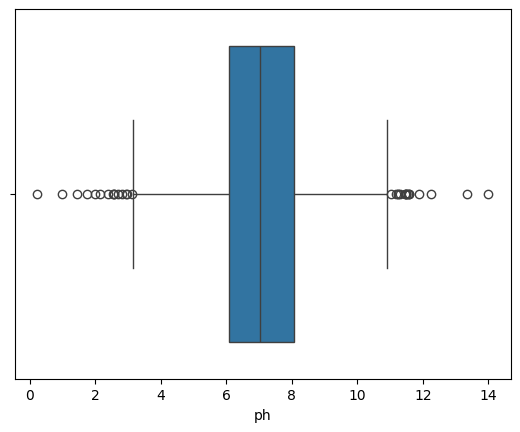

In [ ]:
sns.boxplot(x=df["ph"])

<Axes: xlabel='Hardness', ylabel='Count'>

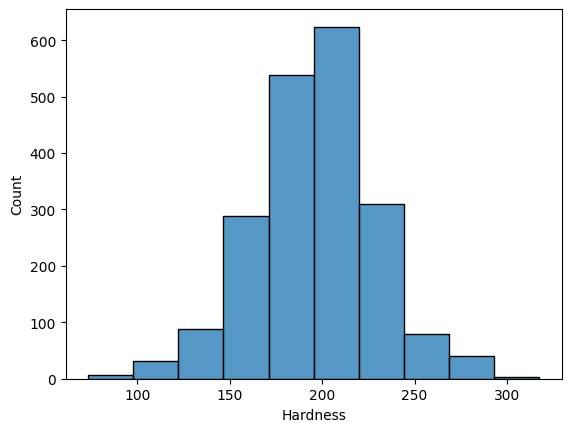

In [ ]:
sns.histplot(x=df["Hardness"], bins=10)

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
x=df.drop('Check',axis=1)
y=df['Check']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
print("accuracy:",rf_accuracy)

accuracy: 0.6600496277915633


In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_logreg = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("accuracy:", logreg_accuracy)


accuracy: 0.5732009925558312


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred_dtree = dtree.predict(x_test)
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
print("accuracy:", dtree_accuracy)

accuracy: 0.598014888337469


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5, random_state=0)
gb.fit(x_train, y_train)
y_pred_gb = gb.predict(x_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("accuracy:", gb_accuracy)

accuracy: 0.6501240694789082


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model_rf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_rf = model_rf.predict(x_test)

# Calculate the accuracy of the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Accuracy of Random Forest:", accuracy_rf)

Accuracy of Random Forest: 0.674937965260546


In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print("accuracy:", svc_accuracy)


accuracy: 0.5732009925558312


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(x_test)

# Calculate the accuracy of the best model
grid_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest with GridSearchCV:", grid_accuracy)

NameError: name 'GridSearchCV' is not defined

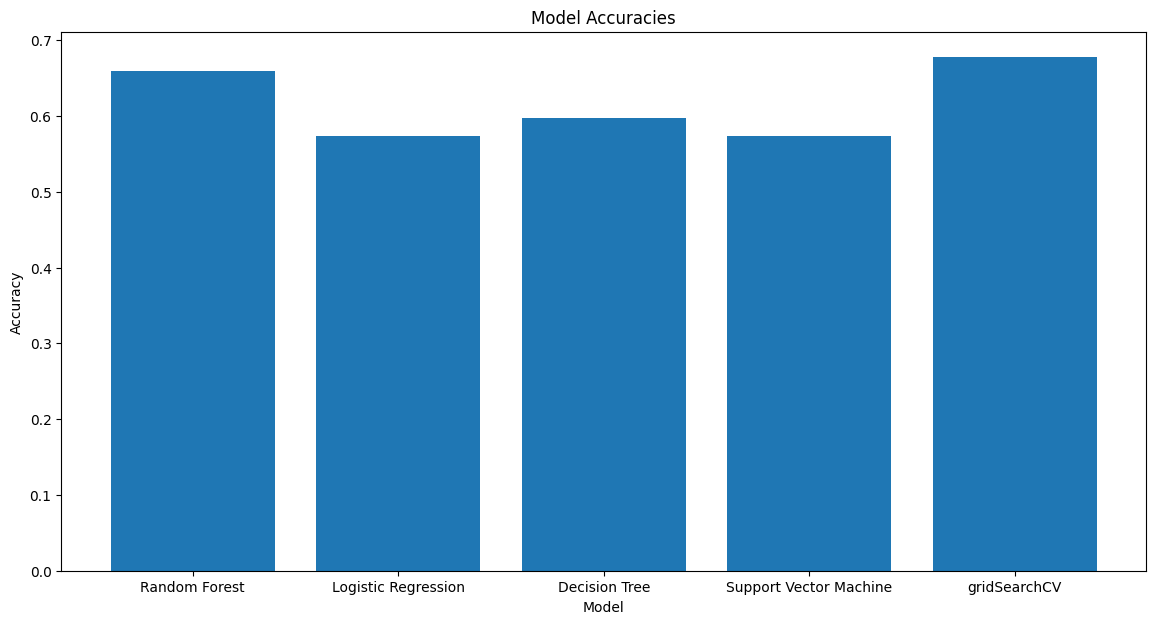

In [ ]:
import matplotlib.pyplot as plt

models = [
    ("Random Forest", rf_accuracy),
    ("Logistic Regression", logreg_accuracy),
    ("Decision Tree", dtree_accuracy),
    ("Support Vector Machine", svc_accuracy),
    ("gridSearchCV",grid_accuracy),
]


plt.figure(figsize=(14, 7))
plt.bar(
    [model[0] for model in models],
    [model[1] for model in models],
)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.show()


In [ ]:
import joblib

joblib.dump(grid_search, open('trained_model.joblib','wb'))

In [ ]:
load_model = joblib.load(open('trained_model.joblib','rb'))

input_data = (8.316766,214.373394,22018.41744,8.059332,356.886136,18.436525,100.341674,4.628771)
id_asnumpy = np.asarray(input_data)
input_reshaped = id_asnumpy.reshape(1,-1)
predict = grid_search.predict(input_reshaped)
print("The predicted potability is :", predict)


if predict == 0:
  print("Non Potable for Human Consumption")
else:
  print("Potable for Human Consumption")

The predicted potability is : [0]
Non Potable for Human Consumption
